In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Task/Project/HR Analytics/HR-Employee-Attrition-All.csv')

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [6]:
X = data[['Department','Age','TotalWorkingYears']]
y = data['Attrition']



In [7]:
# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [8]:
# Initialize and train a Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)



DecisionTreeClassifier()

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)



In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8061224489795918


In [11]:

print(y_pred[:10])


['Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No']


In [12]:
print(y_pred[:100])

['Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'No']


In [15]:
def predict_Attrition():
  age = int(input("enter age: "))
  TotalWorkingYears = int(input("Enter year of working:"))
  Department = str(input("enter department: "))

  user_data = pd.DataFrame([[age,TotalWorkingYears,Department]],columns=['age','TotalWorkingYears','Department'])
  user_data = pd.get_dummies(user_data, columns=['Department'])  # One-hot encode 'Department'

  # Align columns with the training data
  missing_cols = set(X_train.columns) - set(user_data.columns)
  for col in missing_cols:
      user_data[col] = 0  # Add missing columns and fill with 0

  user_data = user_data[X_train.columns]  # Reorder columns to match training data



  prediction = model.predict(user_data)
  result ="Attrition" if prediction[0] == 1 else "no Attrition"
  return result

In [18]:

predict_Attrition()

enter age: 42
Enter year of working:4
enter department: Research & Development


'no Attrition'

In [ ]:


import pickle


filename = 'HR_attrition_model.pkl'
pickle.dump(model, open(filename, 'wb'))


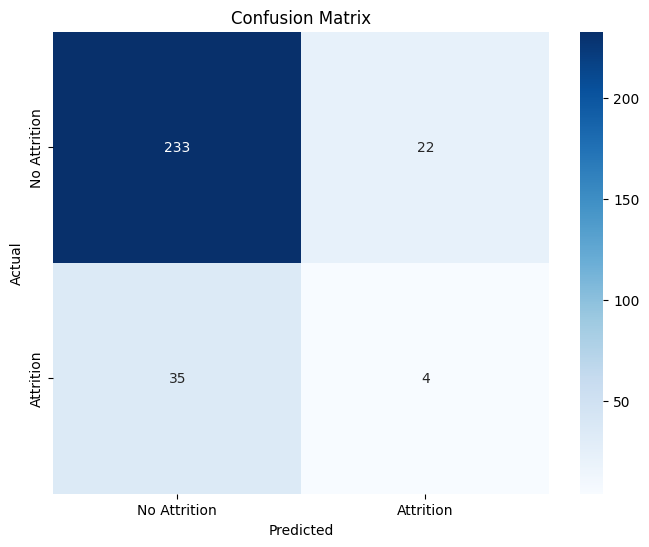

In [19]:
# prompt: generate cunfussion metrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your previous code

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
